In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('./StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


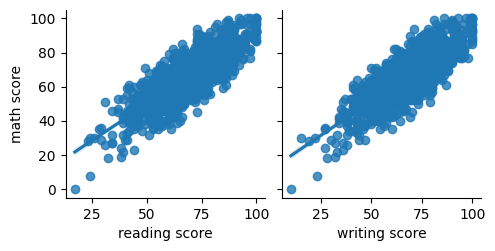

In [9]:
sns.pairplot(df, x_vars=['reading score', 'writing score'], y_vars='math score', kind='reg')
plt.show()

In [10]:
df.shape

(1000, 8)

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [13]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [14]:
df.duplicated().sum()

np.int64(0)

**No dulplicates or null values**

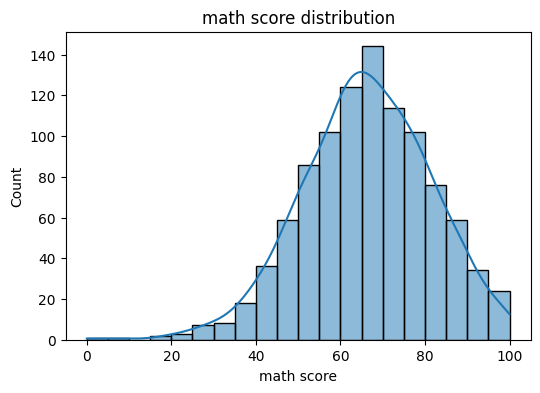

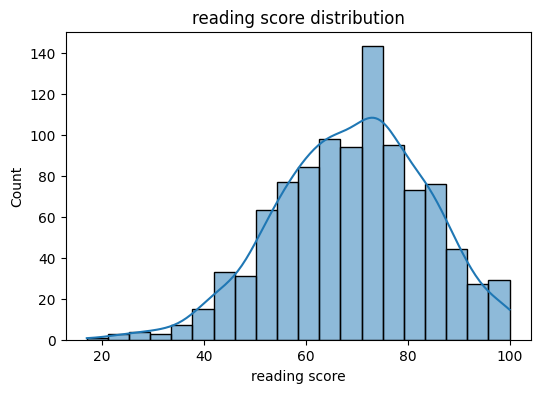

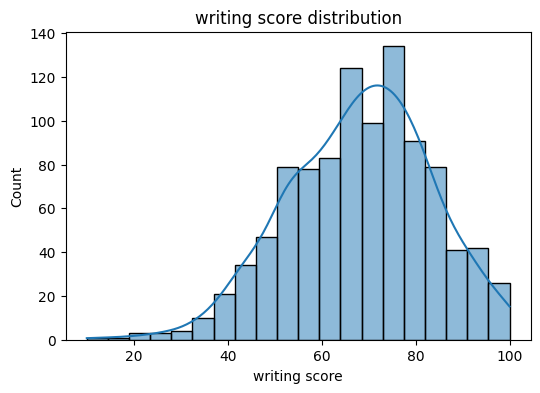

In [15]:
num_cols = ['math score','reading score','writing score']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} distribution')

**Histograms are normally distributed but slightly skewed in the left but ok**

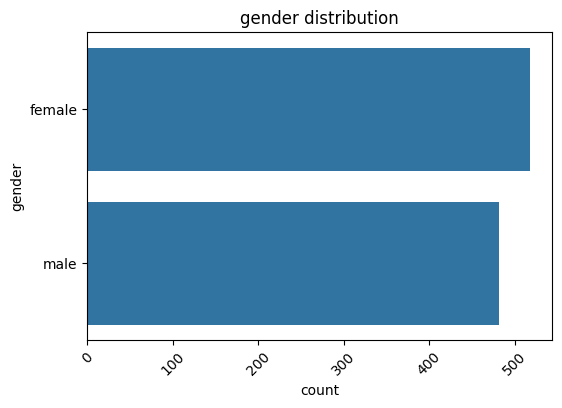

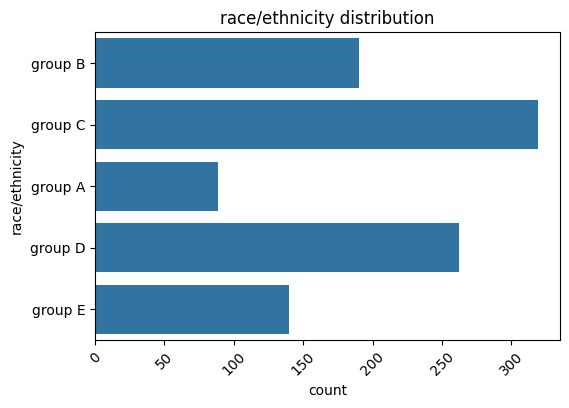

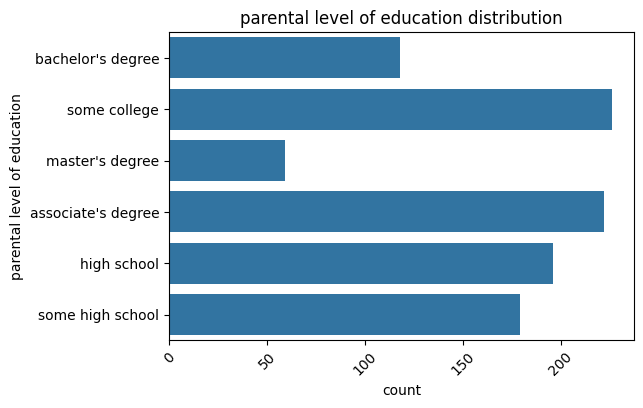

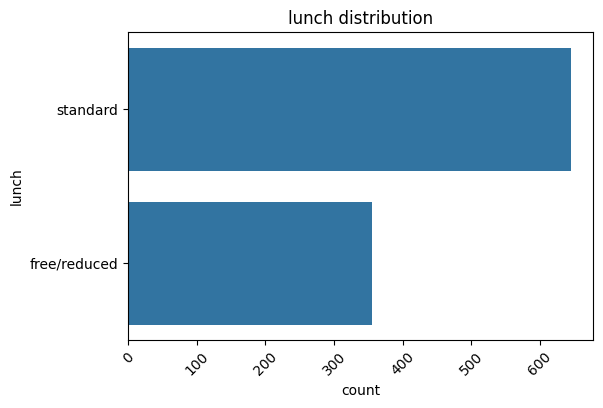

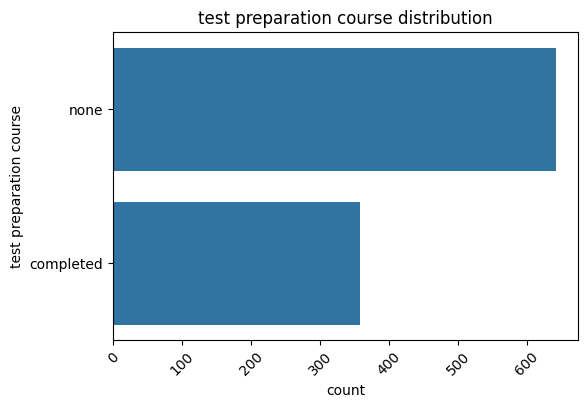

In [16]:
cat_cols=['gender','race/ethnicity', 'parental level of education','lunch','test preparation course']

for col in cat_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(df[col])
  plt.title(f'{col} distribution')
  plt.xticks(rotation=45)

<Axes: xlabel='reading score', ylabel='math score'>

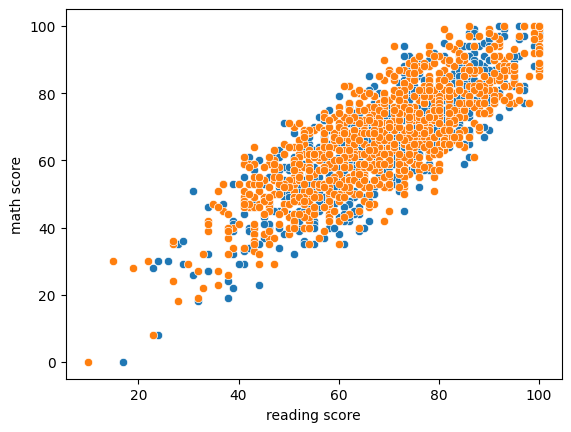

In [17]:
sns.scatterplot(x='reading score', y='math score', data=df)
sns.scatterplot(x='writing score', y='math score', data=df)

<Axes: xlabel='gender', ylabel='math score'>

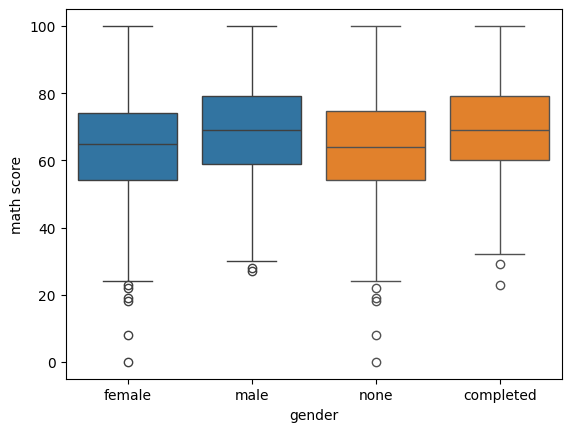

In [18]:
sns.boxplot(x='gender', y='math score', data=df)
sns.boxplot(x='test preparation course', y='math score', data=df)

Text(0.5, 1.0, 'Correlation Map')

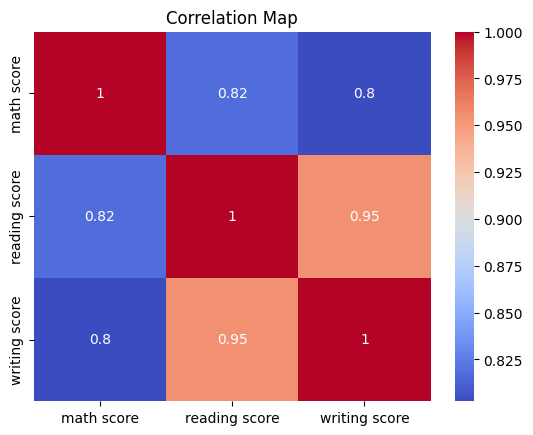

In [20]:
corr = df[['math score','reading score','writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Map")

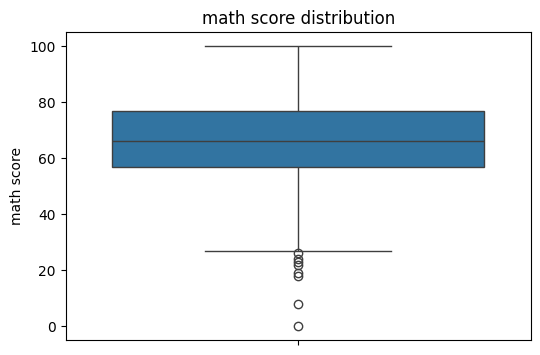

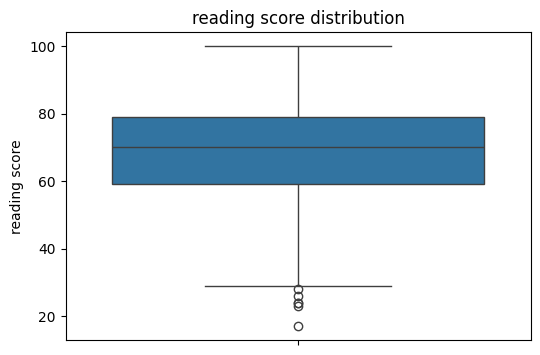

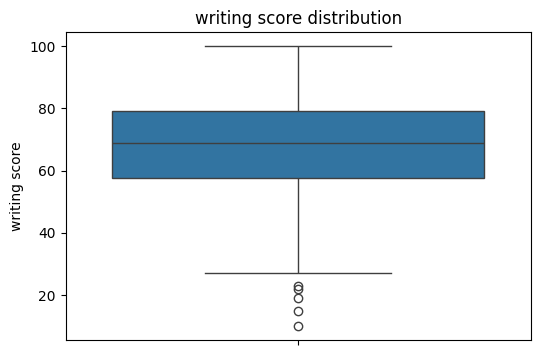

In [21]:
for col in num_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(df[col])
  plt.title(f'{col} distribution')

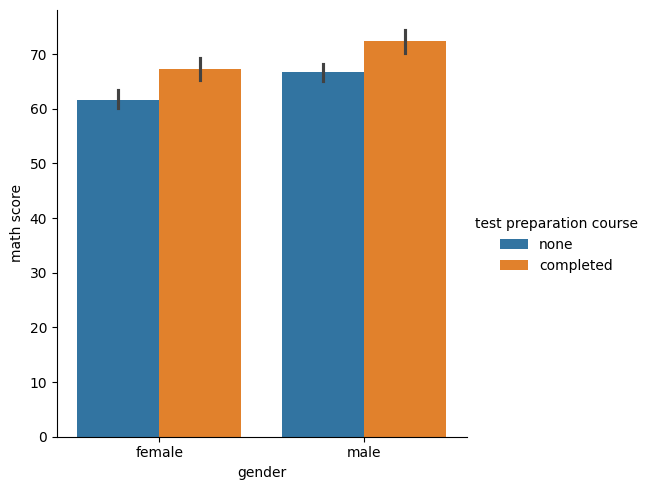

In [26]:
sns.catplot(x='gender', y='math score', data=df, kind='bar', hue='test preparation course')